# Analysis and Prediction of Indian Liver Patients
## About the Data
This public dataset can be found from the University of California Irving Machine Learning Repository [here](https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset). It was collected from the north east region of Andhra, India and divides a set of patients by the class is_patient into two groups.
## Goals
Visualize and identify how different biological factors contribute to liver disease. Then attempt to predict whether or not a patient has liver disease using these factors.

## Load libraries and read in data

In [111]:
# Import libraries
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import itertools
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

Read in data

In [112]:
df = pd.read_csv('../Jupyter Notebooks/input/ILPD.csv')

## Describe and clean data

Check for null data and drop it

In [113]:
df.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

In [114]:
df = df.dropna(subset=['alkphos'])

In [115]:
df.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,1.284974
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Change gender values into float and is_patient into an string that makes sense.

In [116]:
df.gender = [1.0 if each == "Female" else 0.0 for each in df.gender]
df.is_patient = ["non-patient" if each == 1 else "patient" for each in df.is_patient]

## Data Visualization and Analysis

Visualize how many entries are patients vs non-patients

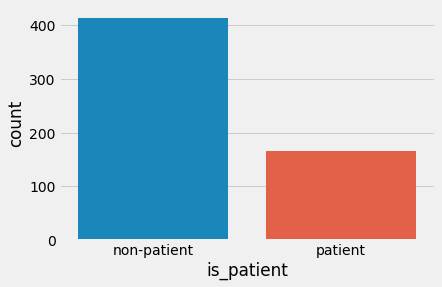

Patients:  165
Not Patients:  414


In [117]:
y=df.is_patient
ax = sns.countplot(y,label="Count")
plt.show()
not_patients,patients = y.value_counts()
print("Patients: ",patients)
print("Not Patients: ",not_patients)

Plotting distribution of features

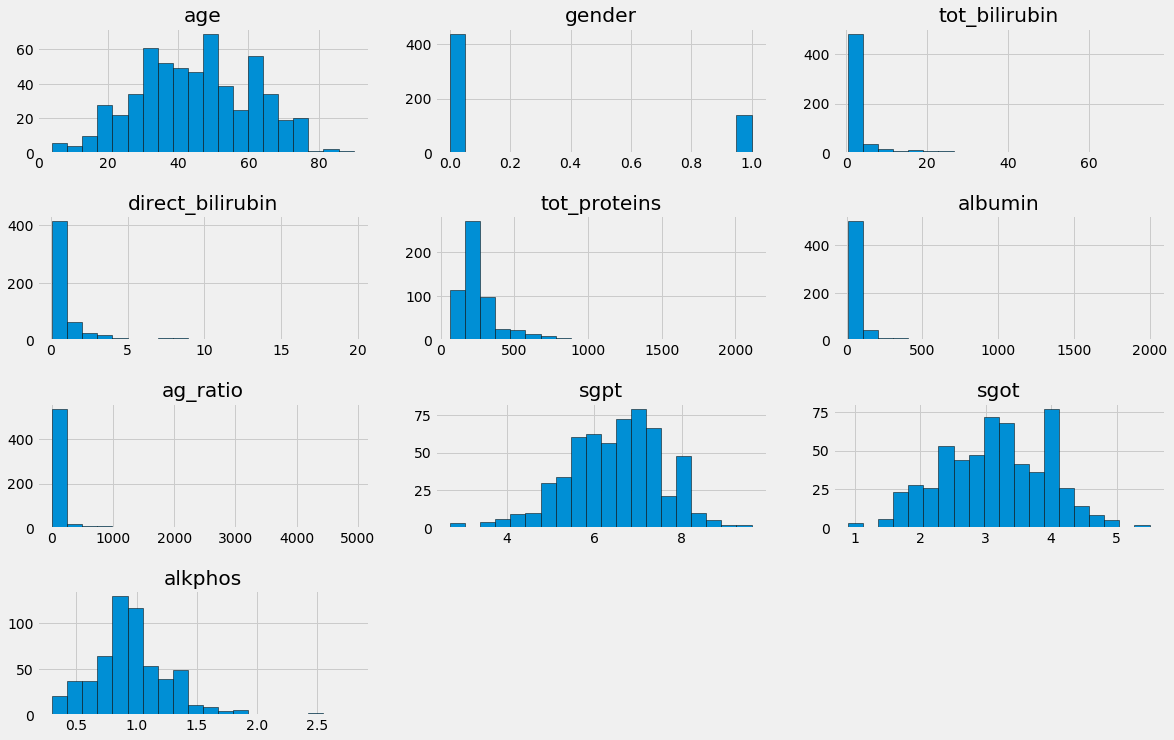

In [118]:
shorter = len(df.columns)-1
columns=df.columns[:shorter]
plt.subplots(figsize=(18,15))
length=len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length/2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    df[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

In [119]:
df.describe()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.241796,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


Correlation Matrix:

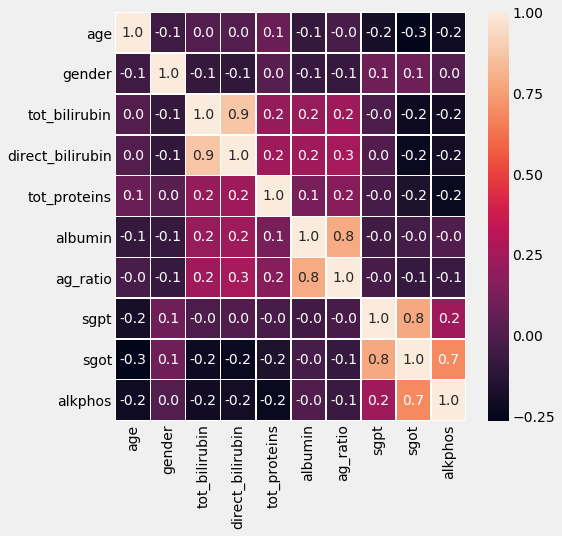

In [120]:
f,ax = plt.subplots(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt=".1f",ax=ax)

From the heat map above we can see that features direct_bilirubin and tot_bilirubin are very high in correlation, so we'll drop "direct_bilirubin".

In [121]:
drop_list1 = ["direct_bilirubin"] #Choose some correlated variables to drop
df = df.drop(drop_list1,axis=1)
df.head()

,age,gender,tot_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,1.0,0.7,187,16,18,6.8,3.3,0.90,non-patient
1,62,0.0,10.9,699,64,100,7.5,3.2,0.74,non-patient
2,62,0.0,7.3,490,60,68,7.0,3.3,0.89,non-patient
3,58,0.0,1.0,182,14,20,6.8,3.4,1.00,non-patient
4,72,0.0,3.9,195,27,59,7.3,2.4,0.40,non-patient


In [122]:
df.describe()

,age,gender,tot_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.241796,3.315371,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064
std,16.221786,0.428542,6.227716,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592
min,4.000000,0.000000,0.400000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.000000,0.800000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,0.000000,1.000000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,0.000000,2.600000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000
max,90.000000,1.000000,75.000000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In the distribution graph above and the stds' of the features, we can see we have a significant amount of outlier values. We'll temporarily removing a some of the outliers/extreme values to better visualize the comparisons of features in a majority of patients with hue=is_patient.

In [123]:
strange_outliers = ["tot_bilirubin","tot_proteins","albumin","ag_ratio"]
reduced = df
for i in strange_outliers:
    reduced = reduced[reduced[i] < reduced[i].quantile(0.95)]

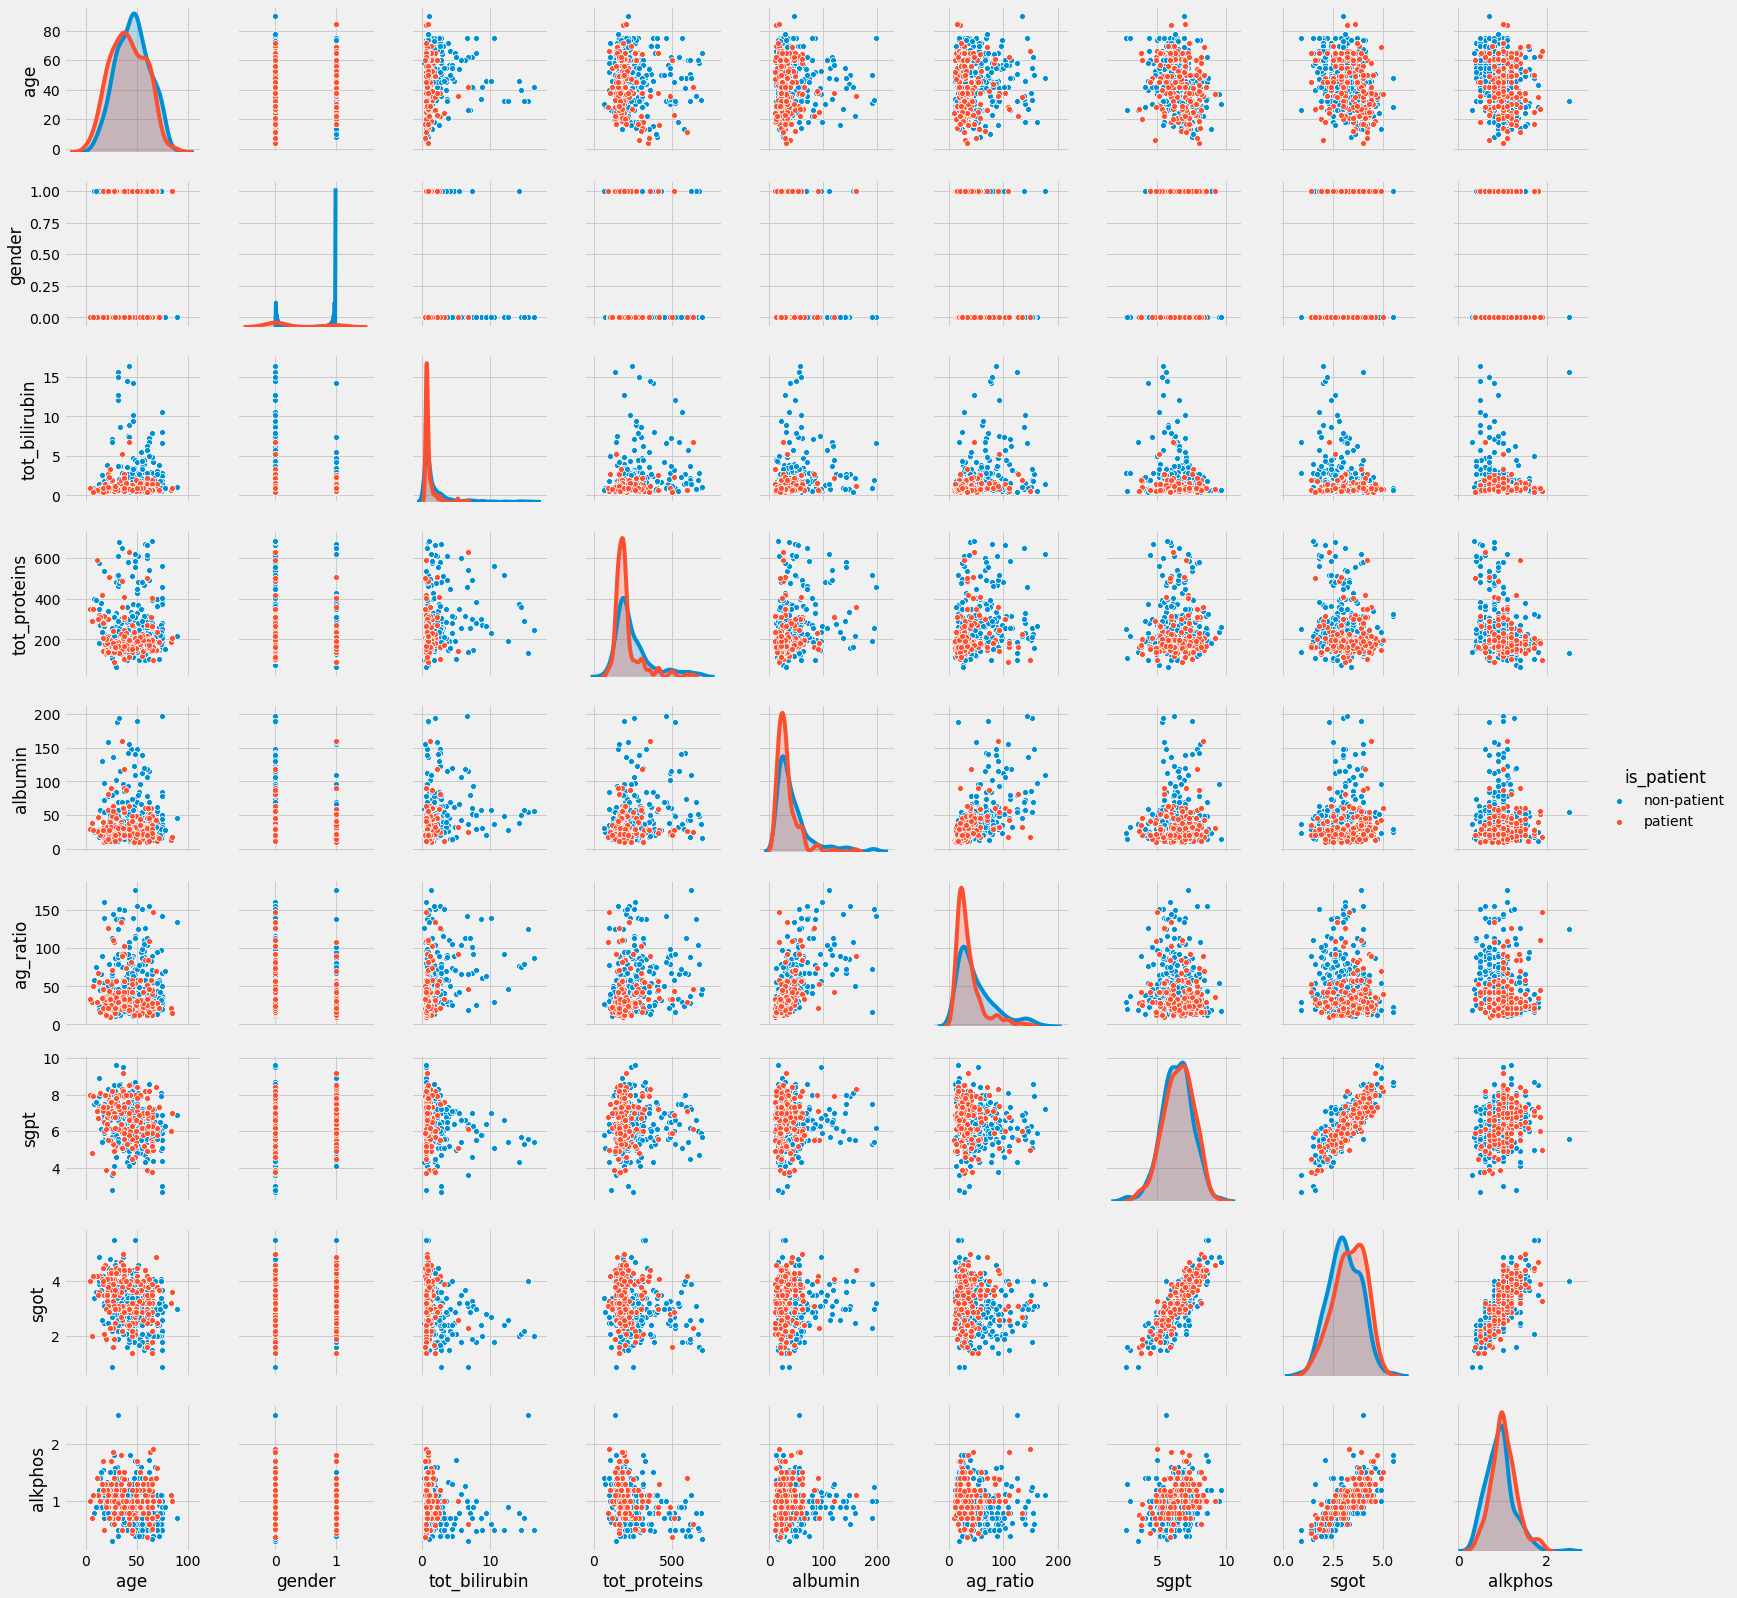

In [124]:
sns.pairplot(data=reduced,hue='is_patient')
plt.show()

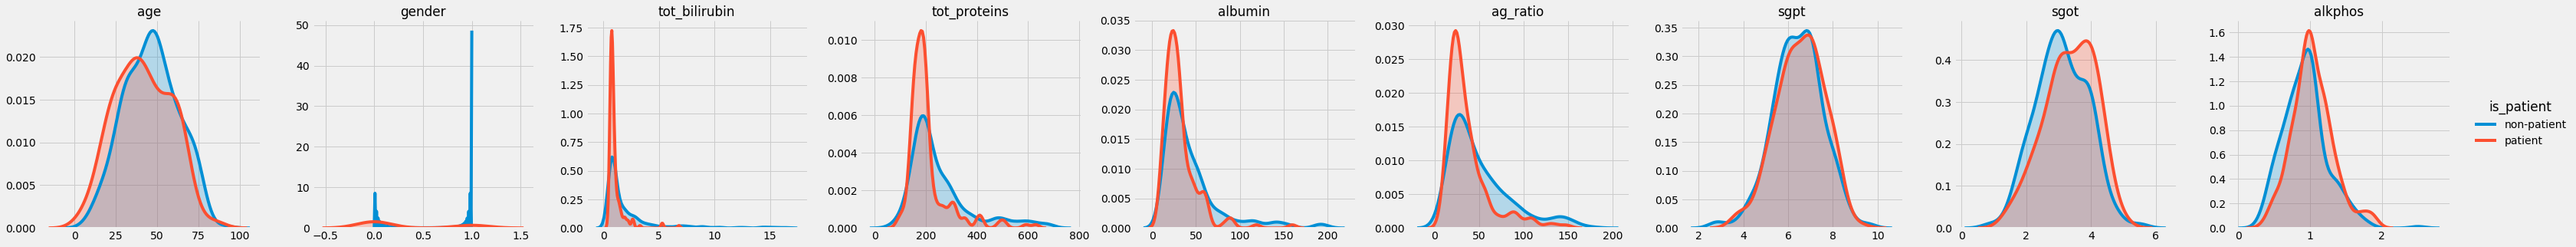

In [125]:
long_df = pd.melt(reduced, id_vars='is_patient', var_name='Indicator', value_name='value')
fg = sns.FacetGrid(long_df, col='Indicator', hue='is_patient', 
                       sharex=False, sharey=False, height = 5)
fg.map(sns.kdeplot, 'value', shade=True, label='Data')\
         .add_legend()\
         .set_titles("{col_name}")\
         .set_axis_labels('')
plt.show()

In [126]:
reduced.describe()

,age,gender,tot_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,44.753191,0.255319,1.738298,236.451064,39.563830,46.042553,6.476383,3.186809,0.968915
std,16.537698,0.436505,2.220543,112.267636,29.896181,32.348092,1.087012,0.800371,0.302973
min,4.000000,0.000000,0.400000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,32.000000,0.000000,0.700000,169.250000,21.000000,23.000000,5.800000,2.600000,0.800000
50%,45.000000,0.000000,0.900000,198.000000,30.000000,34.000000,6.500000,3.100000,1.000000
75%,57.750000,1.000000,1.800000,268.750000,48.000000,58.000000,7.200000,3.875000,1.100000
max,90.000000,1.000000,16.400000,686.000000,198.000000,176.000000,9.600000,5.500000,2.500000


With reduced extreme values and a lower standard of deviation we can observe that in most cases the tot_bilirubin, tot_proteins, albumin, and ag_ratio features seem to have the most significant distribution differences in patients vs non-patients.

## Predictive Modeling
We'll try several different machine learning algorithms with our altered dataset

In [127]:
shorter = len(df.columns)-1
x = df[df.columns[:shorter]]
y=df['is_patient']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [128]:
predictions=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    predictions.append(metrics.accuracy_score(prediction,y_test))
models_dataframe=pd.DataFrame(predictions,index=classifiers)   
models_dataframe.columns=['Accuracy']
models_dataframe

,Accuracy
Linear Svm,0.660920
Radial Svm,0.706897
Logistic Regression,0.643678
KNN,0.660920
Decision Tree,0.632184


In [129]:
model= RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(x,y)
pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)

tot_proteins     0.151561
ag_ratio         0.150793
albumin          0.145104
age              0.139046
tot_bilirubin    0.126139
sgot             0.094152
sgpt             0.093879
alkphos          0.078422
gender           0.020903
dtype: float64

Now we'll try standardizing the data to reduce the standard deviation and select the most relevant features in order to improve the overall accuracy of our prediction model. Through the random forest classifier model we can observe that tot_proteins, ag_ratio, albumin, age, and tot_bilirubin seem to be the most important features.

In [130]:
df2=df[['tot_proteins','ag_ratio','albumin','age','tot_bilirubin','is_patient']]
features=df2[df2.columns[:5]]
features_standard=StandardScaler().fit_transform(features)
x=pd.DataFrame(features_standard,columns=['tot_proteins','ag_ratio','albumin','age','tot_bilirubin'])
x['is_patient']=df2['is_patient']
ispatient=x['is_patient']
x = x.dropna()
train1,test1=train_test_split(x,test_size=0.25,random_state=0,stratify=x['is_patient'])
train_X1=train1[train1.columns[:5]]
test_X1=test1[test1.columns[:5]]
train_Y1=train1['is_patient']
test_Y1=test1['is_patient']

In [131]:
predictions=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(train_X1,train_Y1)
    prediction=model.predict(test_X1)
    predictions.append(metrics.accuracy_score(prediction,test_Y1))
new_models_dataframe=pd.DataFrame(predictions,index=classifiers)   
new_models_dataframe.columns=['New Accuracy']    

In [132]:
new_models_dataframe=new_models_dataframe.merge(models_dataframe,left_index=True,right_index=True,how='left')
new_models_dataframe['%Increase']=new_models_dataframe['New Accuracy']-new_models_dataframe['Accuracy']
new_models_dataframe

,New Accuracy,Accuracy,%Increase
Linear Svm,0.715278,0.660920,0.054358
Radial Svm,0.715278,0.706897,0.008381
Logistic Regression,0.715278,0.643678,0.071600
KNN,0.666667,0.660920,0.005747
Decision Tree,0.659722,0.632184,0.027538


## Conclusion
Through selecting and weighting the most relevant features and testing several different machine learning algorithms on our dataset, the highest accuracy I achieved in determining whether or not a patient is suffering from liver disease is about 72%. We are also able to observe and identify some of the most important factors in determning if a patient may have liver disease. While the final score of about 72% is not enough to make determnistic diagnoses, with more data and further tuning of an algorithm, we may achieve a model accurate enough to be used for early detection or reccomend further testing for liver disease.